In [17]:
#Regression polynomiale
# 1. Importer les librairies
#La manipulation des objets comme les tables
import numpy as np
# les representations graphiques
import matplotlib.pyplot as plt
# la manipulation des fichiers
import pandas as pd
#la regression lineaire
from sklearn.linear_model import LinearRegression
# pour la division des données
from sklearn.model_selection import train_test_split
#Pour l'utilisation des polynomes
from sklearn.preprocessing import PolynomialFeatures
#r au carré r squared mesure d'evaluation pour la regression lineaire
from sklearn.metrics import r2_score

In [18]:
#2. Importer des données

dataset = pd.read_csv('D:/Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


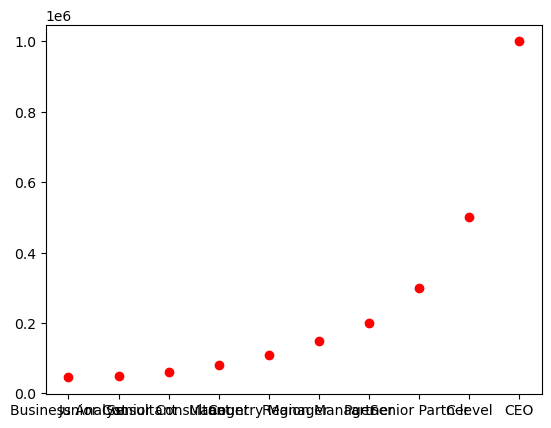

In [19]:
#3. Présenter graphiquement les données
plt.scatter(dataset['Position'],dataset['Salary'],color='red')
plt.show()

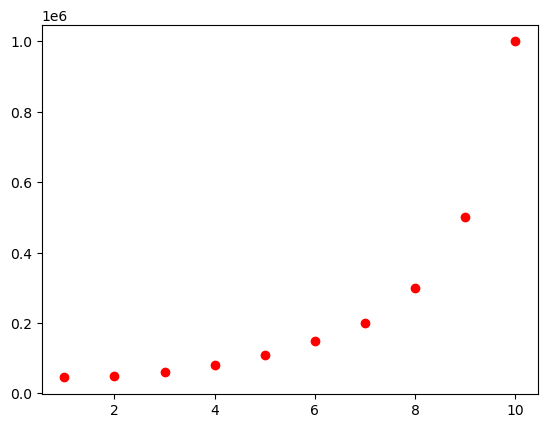

In [20]:
#3. Présenter graphiquement les données
plt.scatter(dataset['Level'],dataset['Salary'],color='red')
plt.show()

In [21]:
#4. Séparer la variable de décision de la variable cible
x = dataset.iloc [ : , 1:2 ].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [22]:
y = dataset.iloc[:, -1].values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [23]:
#5. Diviser les données entre données de test et données d’apprentissage
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [24]:
#6. Comparer la longueur de x_train et y_train - x_test et y_test
len (x_train)

8

In [25]:
len(x_test)

2

In [26]:
len(y_train)

8

In [27]:
len(y_test)

2

In [28]:
7. #Créer un modele de régression linéaire à partir des données d’apprentissage
lin_reg = LinearRegression()

In [29]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [83]:
#8. Appliquer le modele crée sur les données de test
y_pred = lin_reg.predict(x)

In [84]:
len(y_pred)

10

In [85]:
#9. Comparer les valeurs prédites avec les valeurs réelles

In [86]:
y_pred

array([-131218.48739496,  -39726.8907563 ,   51764.70588235,
        143256.30252101,  234747.89915966,  326239.49579832,
        417731.09243697,  509222.68907563,  600714.28571429,
        692205.88235294])

In [87]:
y_test

array([300000, 500000], dtype=int64)

In [88]:
#10. Visualiser la régression linéaire

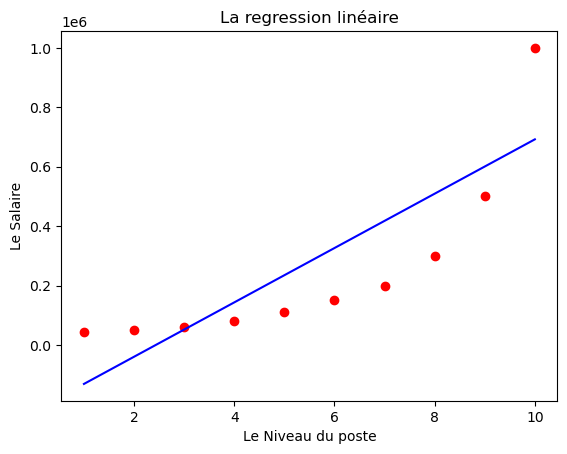

In [89]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title('La regression linéaire')
plt.xlabel('Le Niveau du poste')
plt.ylabel('Le Salaire')
plt.show()

In [90]:
#11. Evaluer la performance d'une régression linéaire avec la mesure R-Squared
#12. Evaluer la capacité du modele à apprendre les données
r2= r2_score(y_train,lin_reg.predict(x_train))
r2

0.6822733031585658

In [91]:
#13. Evaluer la capacité du modele à généraliser
r2= r2_score(y_test,y_pred)
r2

ValueError: Found input variables with inconsistent numbers of samples: [2, 10]

In [92]:
#14. Appliquer la régression polynomiale de degré 4

# creer un polynome de degré 4
poly_reg = PolynomialFeatures(degree = 8)

# Transformation des données (données polynomiales)
x_poly = poly_reg.fit_transform(x)

#creer une regression lineaire appliquée sur des données polynomiales

lin_reg_2 = LinearRegression ()

# apprentissage du modele
lin_reg_2.fit (x_poly , y)

# Prediction
y_poly_pred = lin_reg_2.predict(x_poly)



In [93]:
#15. Visualiser la régression polynomiale

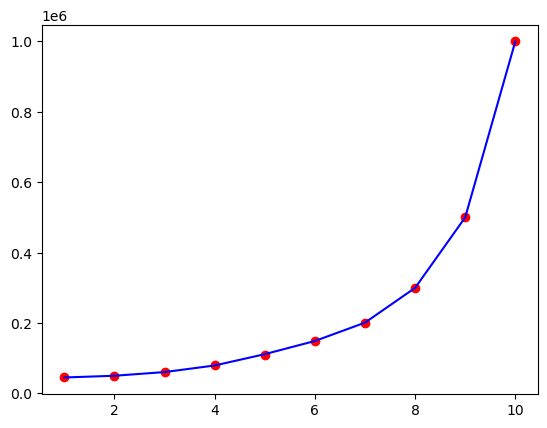

In [94]:
#afficher les données
plt.scatter (x, y , color ='red')
#afficher la regression polynimiale
plt.plot(x, y_poly_pred  ,color='blue')

In [95]:
x_grid =np.arange (min(x),max(x),0.1)
x_grid = x_grid.reshape((len(x_grid),1))

# Transformation des données (données polynomiales)
x_grid_poly = poly_reg.fit_transform(x_grid)

# Prediction
y_grid_poly_pred = lin_reg_2.predict(x_grid_poly)

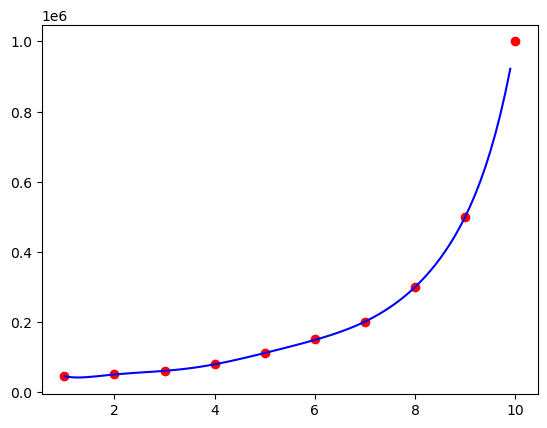

In [96]:
#afficher les données
plt.scatter (x, y , color ='red')
#afficher la regression polynimiale
plt.plot(x_grid, y_grid_poly_pred ,color='blue')

In [97]:
lin_reg_2.predict(poly_reg.fit_transform([[7.5]]))

array([241920.03472459])

In [98]:
# evaluation de laregression lineaire simple
score=r2_score(y, y_pred)
score

0.6456124187345431

In [99]:
# evaluation de laregression polynomiale de degré 8
score=r2_score(y, y_poly_pred)
score


0.9999934972438328